# LOCATING AN AFRICAN RESTAURANT IN TORONTO
_BATTLE OF THE NEIGHBOURHOODS: An Analysis of Neighbourhoods in the city of Toronto using Machine Learning._

## Introduction

### Background
Have you ever relocated to a new country and wanted a taste of the meal back home? A number of people, after arriving in a new country, look for where they can get meals close to what they experience back home (the country they came from). This, among many other reasons, gave birth to the establishment of restaurants like: Chinese Restaurants, Italian restaurants and the likes.

Canada is one of the leading countries in policies that favor immigration. When immigrants arrive in Canada, the prime city of choice is usually Toronto.

I have a few friends in North York, Toronto. They tell me time and again that they wish they had a restaurant that would serve them some African dishes.

### Problem Statement
This project aims to find the best neighborhood in North York Toronto to setup a New African Restaurant for immigrants from Africa and others who want to have a taste of delicious African delicacies.

## Importating Required Libraries

In [1]:
#These are to be skipped if already installed.

#Install BeautifulSoup
!conda install beautifulsoup4 --yes

#Install Request
!conda install requests --yes

#Install Folium
!conda install -c conda-forge folium=0.5.0 --yes

#Install Geopy
!conda install -c conda-forge geopy --yes

#Install kneed for determining number of Clusters
conda install -c conda-forge kneed

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2021.5.3~ --> pkgs/main::ca-certificates-2021.5.25-h06a4308_1
  certifi            conda-forge::certifi-2021.5.30-py36h5~ --> pkgs/main::certifi-2021.5.30-py36h06a4308_0
  openssl            conda-forge::openssl-1.1.1k-h7f98852_0 --> pkgs/main::openssl-1.1.1k-h27cfd23_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2021.5.25-~ --> conda-forge::ca-certificates-2021.5

In [2]:
# library for data analysis
import pandas as pd

# library to handle data in a vectorized manner
import numpy as np

# library to handle requests
import requests

#Library for web scrapping
from bs4 import BeautifulSoup

#For string manipulation
import re

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim  

# map rendering library
import folium

# library to handle JSON files
import json

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # Import Matplotlib for visualizations

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    kneed-0.7.0                |     pyh9f0ad1d_0          12 KB  conda-forge
    scikit-learn-0.24.2        |   py36h2fdd933_0         7.5 MB  conda-forge
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.0.1-pyhd8ed1ab_0
  kneed              conda-forge/noarch::kneed-0.7.0-pyh9f0ad1d_0
  scikit-learn       conda-forge/linux-64::scikit-learn-0.24.2-py36h2fdd933_0
  threadp

In [ ]:
#import plotly.express as px
#import plotly.graph_objects as go # to ploty Plotly graph objects
#import plotly.io as pio # Plotly renderer

## Data

For this project, we will combine three datasets to achieve our goal.

The first source of data is Wikipedia. We will scrap the Wikipedia website for neighborhoods in Toronoto using Beautiful Soup.

We will then use data of geographical coordinates gotten from previous exercises in this program.

And finally, we will use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data.

These data combination will be the ingredients we use in cooking our location for an African Restaurant in North York, Toronto.

#### Scraping Website For Data

As a form of data mining, the Wikipedia website was scrapped and the data gotten was transformed into a dataframe for analysis.

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [4]:
soup = BeautifulSoup(source,"html5lib")

In [38]:
# scrape table into list

postalCode = []
boroughs = []
neighborhoods = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if (len(cells)>0):
        for c in cells:
            s = c.span.text
            if "/" in s:
                start = s.find("(") + len("(")
                end2 = s.find(")")
                substring = np.array(s[start:end2].split('/'))
                for i in range(len(substring)):
                    # Postal Code Column
                    postalCode.append(c.b.text)
                    # Clean and Append Borough Column
                    substring1 = s.partition("(")[0]
                    boroughs.append(substring1)
                    # Clean and Append Neighborhood Column
                    neighborhoods.append(substring[i])
            else:
                # Postal Code Column
                postalCode.append(c.b.text)
                if "(" in c.span.text:
                    substring1 = s.partition("(")[0]
                    boroughs.append(substring1)
                else:
                    boroughs.append(s)
                    # Clean and Append Neighborhood Column
                if "(" in c.span.text:
                    start = s.find("(") + len("(")
                    end2 = s.find(")")
                    substring2 = s[start:end2]
                    neighborhoods.append(substring2)
                else:
                    neighborhoods.append("Not assigned")


Toronto_table = [('PostalCode', postalCode), ('Borough', boroughs), ('Neighborhood', neighborhoods)]
Toronto_df = pd.DataFrame.from_dict(dict(Toronto_table))
Toronto_df.head(10)

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Manor
7,M6A,North York,Lawrence Heights
8,M7A,Queen's Park,Ontario Provincial Government
9,M8A,Not assigned,Not assigned


## Data Cleaning and Preparation

In [39]:
#Pre-process the dataframe

Toronto_df_na = Toronto_df[Toronto_df.Borough != 'Not assigned'].reset_index(drop = True)

Toronto_df_group = Toronto_df_na.groupby(['PostalCode','Borough'],as_index = False).agg(lambda x: ','.join(x))

neighbor_rows = Toronto_df_group.Neighborhood == 'Not assigned'

Toronto_df_group.loc[neighbor_rows, 'Neighborhood'] = Toronto_df_group.loc[neighbor_rows,'Borough']

Final_Toronto_df = Toronto_df_group

Final_Toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern , Rouge"
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
2,M1E,Scarborough,"Guildwood , Morningside , West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [40]:
Final_Toronto_df.shape

(103, 3)

#### Attaching Coordinates to DataFrame

We begin by importing the file that contains these coordinates

In [41]:
Cords_df = pd.read_csv('Geospatial_Coordinates.csv')

Cords_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [42]:
# Merging DataFrames

Cords_df.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
Final_Toronto_df = Final_Toronto_df.merge(Cords_df, on="PostalCode", how="left")

In [43]:
Final_Toronto_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Exploration

#### Getting the Geographical Coordinates of Toronto

Geopy library will be used to get the longitude and latitude values of Toronto.

In [44]:
# T_explorer will be used as user_agent

address = 'Toronto ON, Canada' # Name of the city we want the location coordinates

geolocator = Nominatim(user_agent="T_explorer")  # User Agent. Any name can be used
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronoto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronoto are 43.6534817, -79.3839347.


#### Creating a map of Toronto with neighborhoods superimposed on top.

In [45]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Final_Toronto_df['Latitude'], Final_Toronto_df['Longitude'], Final_Toronto_df['Borough'], Final_Toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## NEIGHBORHOOD EXPLORATION

#### Define Foursquare Credentials and Version

In [57]:
# DELETE BEFORE PUBLISHING

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Exploring Scarborough

In [47]:
Scarborough_data = Final_Toronto_df[Final_Toronto_df['Borough'] == "Scarborough"].reset_index(drop=True)
Scarborough_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Exploring North York

In [48]:
NYork_data = Final_Toronto_df[Final_Toronto_df['Borough'] == "North York"].reset_index(drop=True)
NYork_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview , Henry Farm , Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills , Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale , Newtonbrook",43.789053,-79.408493


Let's get the geographical coordinates of North York.

In [49]:
address = 'North York Toronto' # Name of the city we want the location coordinates

geolocator = Nominatim(user_agent="T_explorer")  # User Agent. Any name can be used
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 43.7543263, -79.44911696639593.


visualizing North York and the neighborhoods in it.

In [51]:
# create map of Manhattan using latitude and longitude values
map_NYork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(NYork_data['Latitude'], NYork_data['Longitude'], NYork_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYork)
    
map_NYork.save('NYork.html')
map_NYork

#### Exploring all Neighborhoods in North York for Top 100 venues within a 500 meter radius

In [55]:
# function that extracts the category of venues for all neighbourhoods in North York

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

#### Running the above function on each neighborhood and creating a new dataframe called *toronto_venues*.

In [58]:
NYork_venues = getNearbyVenues(names = NYork_data['Neighborhood'],
                                   latitudes = NYork_data['Latitude'],
                                   longitudes = NYork_data['Longitude']
                                  )

Hillcrest Village
Fairview , Henry Farm , Oriole
Bayview Village
York Mills , Silver Hills
Willowdale , Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor , Wilson Heights , Downsview North
Northwood Park , York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Bedford Park , Lawrence Manor East
Lawrence Manor , Lawrence Heights
Glencairn
North Park , Maple Leaf Park , Upwood Park
Humber Summit
Humberlea , Emery


#### Size of the resulting dataframe

In [59]:
print(NYork_venues.shape)
NYork_venues.head()

(251, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,New York Fries,43.803664,-79.363905,Fast Food Restaurant
1,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
2,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
3,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
4,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run


#### Number of unique categories from all the returned venues

In [96]:
print('There are {} uniques categories.'.format(len(NYork_venues['Venue Category'].unique())))
NYork_venues['Venue Category'].unique()[:50]

There are 100 uniques categories.


array(['Fast Food Restaurant', 'Golf Course', 'Pool',
       'Mediterranean Restaurant', 'Dog Run', 'Shopping Mall',
       'Toy / Game Store', 'Electronics Store', 'Restaurant',
       'Chocolate Shop', 'Coffee Shop', 'Pharmacy', 'Juice Bar', 'Bakery',
       'Movie Theater', 'Salon / Barbershop', 'Burger Joint',
       'Department Store', 'American Restaurant', 'Clothing Store',
       'Theater', 'Food Court', 'Bank', 'Japanese Restaurant',
       'Liquor Store', 'Video Game Store', 'Asian Restaurant',
       'Cosmetics Shop', 'Burrito Place', 'Sporting Goods Shop', 'Bar',
       'Boutique', "Women's Store", 'Supplement Shop', "Men's Store",
       'Pizza Place', 'Luggage Store', 'Mobile Phone Shop',
       'Greek Restaurant', 'Chinese Restaurant', 'Sandwich Place',
       'Dessert Shop', 'Bus Station', 'Convenience Store', 'Intersection',
       'Baseball Field', 'Café', 'Gym', 'Grocery Store',
       'Ramen Restaurant'], dtype=object)

### Checking to see if Result contains African Restaurants

In [107]:
"Restaurant" in NYork_venues['Venue Category'].unique()

True

In [108]:
"African Restaurant" in NYork_venues['Venue Category'].unique()

False

From this result set, we have restaurants, but we do not have African Restaurants

## Analyzing Each Neighborhood

In [98]:
# one hot encoding
onehot = pd.get_dummies(NYork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = NYork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

print(onehot.shape)
onehot.head()


(251, 101)


,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,...,Sporting Goods Shop,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,Hillcrest Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hillcrest Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hillcrest Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hillcrest Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [99]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,...,Sporting Goods Shop,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor , Wilson Heights , Downsview North",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.090909,...,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bedford Park , Lawrence Manor East",0.000000,0.0000,0.035714,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035714,0.035714,0.000000,0.035714,0.000000,0.000000,0.035714
3,Don Mills,0.000000,0.0000,0.000000,0.038462,0.000000,0.038462,0.0000,0.000000,0.000000,...,0.038462,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Downsview,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Fairview , Henry Farm , Oriole",0.000000,0.0000,0.014925,0.000000,0.000000,0.014925,0.0000,0.014925,0.029851,...,0.014925,0.000000,0.014925,0.000000,0.000000,0.014925,0.014925,0.014925,0.000000,0.029851
6,Glencairn,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Hillcrest Village,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Humber Summit,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Humberlea , Emery",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Dataframe's new size

In [100]:
grouped.shape

(18, 101)

### Creating a Data Frame for Restaurants

In [109]:
rest = grouped[["Neighborhood", "Restaurant"]]
rest.head()

,Neighborhood,Restaurant
0,"Bathurst Manor , Wilson Heights , Downsview North",0.045455
1,Bayview Village,0.000000
2,"Bedford Park , Lawrence Manor East",0.071429
3,Don Mills,0.076923
4,Downsview,0.000000


## Cluster Neighborhoods

### Determining Optimum number of Clusters (Elbow Method)
For this method, the dataset is fit with the k-means model for a range of values (1-10). The distortions for each value of k is stored and then plotted on a line chart. The point of inflection is a good indication that the model fits best at that point.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


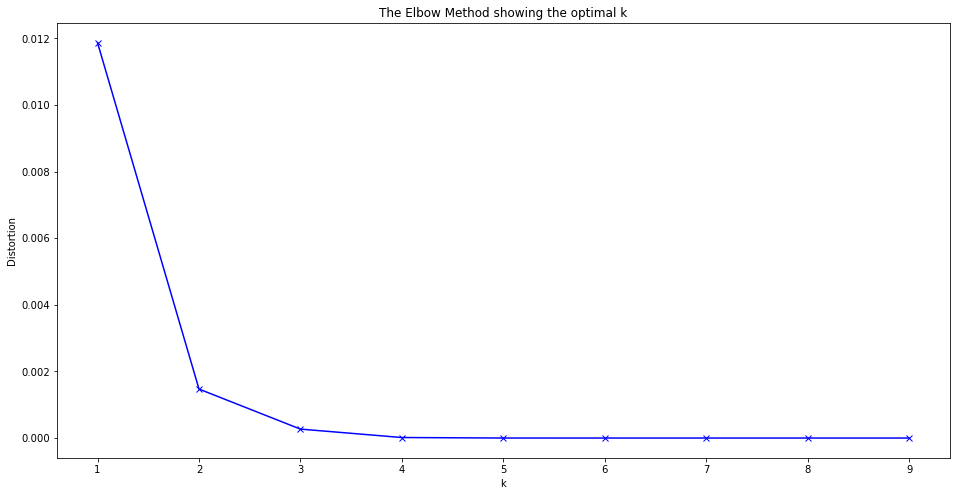

In [111]:
# Create a new dataframe and drop 'Neighbourhood name' as ML algorithm can be done 
# for only numerical values
clustering = rest.drop('Neighborhood', 1).copy(deep=True)
distortions = [] # Store results on distortions in a list
K = range(1, 10) # Initialize k
for k in K:
    kmeanModel = KMeans(n_clusters=k) # Initialize kMeans model
    kmeanModel.fit(clustering) # Fit model to dataset
    distortions.append(kmeanModel.inertia_) # Append distortions to list for each k value
# use matplotlib to plot function
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [115]:
# KneeLocator is used to compute the point of inflection
# especially when it is difficult to locate the point of inflection from the curve above
from kneed import KneeLocator
kl = KneeLocator(range(1, 10),
                 distortions,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 2


Run *k*-means to cluster the neighborhood into 2 clusters.

In [117]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int32)

#### Add Cluster to DataFrame

In [122]:
merged = rest.copy()

# add clustering labels
merged["Cluster Labels"] = kmeans.labels_
merged.head()

merged = merged.join(NYork_data.set_index("Neighborhood"), on="Neighborhood")
merged.head()

,Neighborhood,Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Bathurst Manor , Wilson Heights , Downsview North",0.045455,1,M3H,North York,43.754328,-79.442259
1,Bayview Village,0.000000,0,M2K,North York,43.786947,-79.385975
2,"Bedford Park , Lawrence Manor East",0.071429,1,M5M,North York,43.733283,-79.419750
3,Don Mills,0.076923,1,M3B,North York,43.745906,-79.352188
3,Don Mills,0.076923,1,M3C,North York,43.725900,-79.340923


### Visulaize Resulting Cluster

In [124]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters.save('map_clusters.html')
map_clusters

### Examining the Clusters

Cluster 1

In [125]:
merged.loc[merged['Cluster Labels'] == 0]

,Neighborhood,Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
1,Bayview Village,0.000000,0,M2K,North York,43.786947,-79.385975
4,Downsview,0.000000,0,M3K,North York,43.737473,-79.464763
4,Downsview,0.000000,0,M3L,North York,43.739015,-79.506944
4,Downsview,0.000000,0,M3M,North York,43.728496,-79.495697
4,Downsview,0.000000,0,M3N,North York,43.761631,-79.520999
6,Glencairn,0.000000,0,M6B,North York,43.709577,-79.445073
7,Hillcrest Village,0.000000,0,M2H,North York,43.803762,-79.363452
8,Humber Summit,0.000000,0,M9L,North York,43.756303,-79.565963
9,"Humberlea , Emery",0.000000,0,M9M,North York,43.724766,-79.532242
10,"Lawrence Manor , Lawrence Heights",0.000000,0,M6A,North York,43.718518,-79.464763


Cluster 2

In [126]:
merged.loc[merged['Cluster Labels'] == 1]

,Neighborhood,Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Bathurst Manor , Wilson Heights , Downsview North",0.045455,1,M3H,North York,43.754328,-79.442259
2,"Bedford Park , Lawrence Manor East",0.071429,1,M5M,North York,43.733283,-79.419750
3,Don Mills,0.076923,1,M3B,North York,43.745906,-79.352188
3,Don Mills,0.076923,1,M3C,North York,43.725900,-79.340923
5,"Fairview , Henry Farm , Oriole",0.044776,1,M2J,North York,43.778517,-79.346556


### Observation

We had initially observed that there were no African Restaurants in this Neighborhood of Toronto. This is however not for a lack of restaurants, as Cluster 1 shows that there are many restaurants. Cluster 1 has the higher number of restaurants of the two clusters.

We notice, on the other hand, that there aren't much restaurants in Cluster 2. This might be a good place to sight an African Restaurant as it will quickly be noticed.